# Thera Bank Personal Loan Campaign

## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: number of years of professional experience
* Income: Annual income of the customer (in thousands dollars)
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousands dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any (in thousands dollars)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

## Learning Outcomes:
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Steps and tasks:

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6. Give conclusion related to the Business understanding of your model? (5 marks)

# Solution

**PS: The code in this notebook assumes that the dataset is located in the same directory as this notebook. When running the code please put the data file in the same directory/folder.**

Here is the list of dependencies in my current conda environment:

```yaml
dependencies:
    - python=3.7
    - pip>=20.0
    - jupyter
    - tensorflow=2.0
    - scikit-learn
    - scipy
    - pandas
    - pandas-datareader
    - matplotlib
    - pillow
    - tqdm
    - requests
    - h5py
    - pyyaml
    - flask
    - boto3
    - pip:
        - bayesian-optimization
        - gym
        - kaggle
```

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

## Import Libraries
* matplotlib: for plotting backend
* numpy: for working with matrices
* pandas: for loading csv data as dataframes
* seaborn: for graphs and visualizations
* sklearn: scikit learn for training and model building
    - train_test_split function to split the data into training and test sets
    - LogisticRegression class for training the model
    - metrics module for claculating the confusion matrix

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Import Data
Data is contained in the csv file named ```Bank_Personal_Loan_Modelling.csv``` (notice the casing of file name - it matters on unix like systems)

In [2]:
df_bank_loan_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_bank_loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df_bank_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df_bank_loan_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
df_bank_loan_data.shape

(5000, 14)

## Insights about data
In the below section we will discuss some of the raw insights that can be derived from the current EDA so far.
* Most of the variables in data are numeric (except for a few which are binary).
* ID column in the data is a unique identifier per row and as such would not add any value to the model.
* There are no null values in the data however in the experience column we do have negative values which most likely are data capture errors (because you cannot have negative number of years as experience). We will probably replace these values with 0 (need to analyze the data it could be that these accidentally have the sign flipped).
* Zip code is a categorical value and depending on the number of unique values we will make a decision whether to keep it or get rid of it.
* The following variables are categorical variables:
    - Education: Multiclass (Undergrad: 1; Graduate: 2; Advanced/Professional: 3)
    - Securities Account: Binary (No: 0, Yes: 1
    - CD Account: Binary (No: 0, Yes: 1)
    - Online: Binary (No: 0, Yes: 1)
    - Credit Card: Binary (No: 0, Yes: 1)
* Age is a numeric value (but it can be converted into bins - not sure if it would add any value to the model building - will have to evaluate)

### Analysis of negative values in experience column
Get the rows where experience is less than 0

In [6]:
df_bank_loan_data.loc[df_bank_loan_data['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


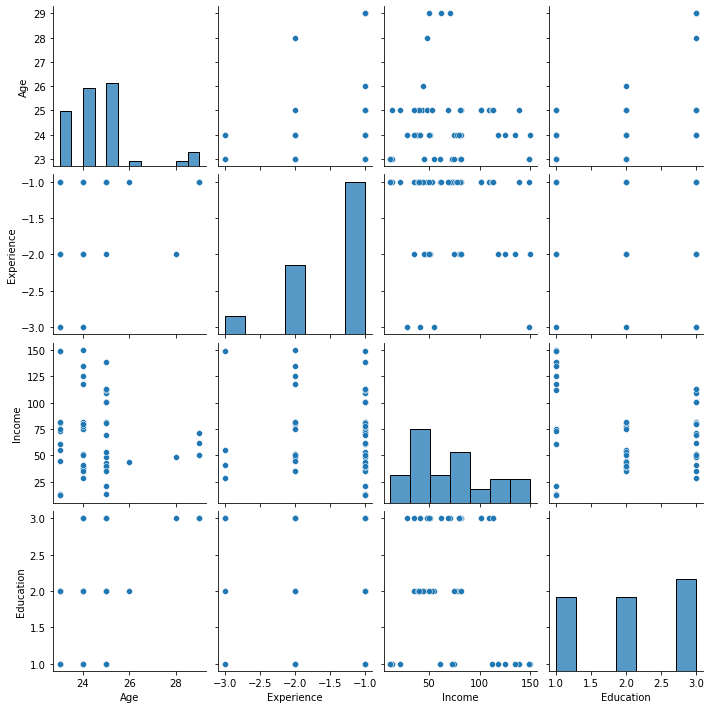

In [7]:
sns.pairplot(data=df_bank_loan_data.loc[df_bank_loan_data['Experience']<0][['Age', 'Experience', 'Income', 'Education']])

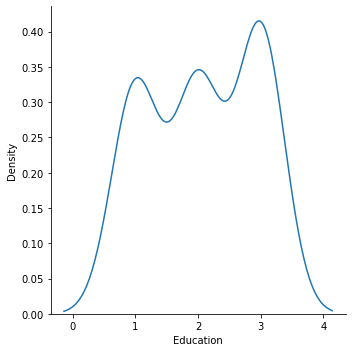

In [8]:
sns.displot(df_bank_loan_data.loc[df_bank_loan_data['Experience']<0], x='Education', kind='kde')

### From the above analysis we can say the following:
* all of the rows with negative experience belong to customers below 30 years of age. which makes it possible that probably the signs are flipped by error (typo, extraction or other artifact) because these are very young people and the negative values range between -3 and -1 which could have actually been 1 to 3 years.
* When we try to study the experience in relation to income we get even more confidence that probably the signs are indeed flipped as we can see a good spread of income across these negative years of experience. As we can see people with -1 years of experience are almost uniformly distributed across all income groups.
* Also when we see the distribution of education across these rows we see that majority of them are Graduate or Highly educated which explain the high income levels despite the lower experience (assuming that the signs are actually flipped - example 3 years is written as -3 by mistake)

**Conclusion: We are going flip the signs for these values (i.e. Make them positive if they are negative - no change to positive values)**

In [9]:
def fixExperience(row):
    if row['Experience']<0:
        return row['Experience']*-1
    else:
        return row['Experience']
df_bank_loan_data['Experience'] = df_bank_loan_data.apply(fixExperience,axis=1)
df_bank_loan_data.loc[df_bank_loan_data['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

## Unique Values in Each Column

In [10]:
# let's see the unique values in each column
df_bank_loan_data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

## Number of people with zero mortgage?
* Visualization of entire distribution of mortgage (to see skewness)
* Count of people with zero mortgage
* box plots to see outliers and percentiles

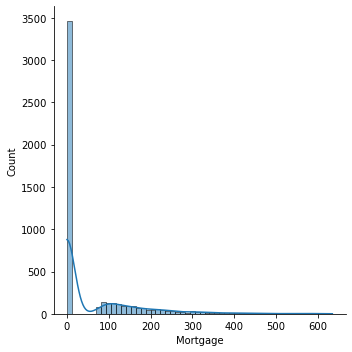

In [11]:
# lets plot the distribution of mortgage
sns.displot(df_bank_loan_data, x='Mortgage', kde=True)

In [12]:
# number of people with zero mortgage
zero_mortgage_count=df_bank_loan_data[df_bank_loan_data['Mortgage']==0]['Mortgage'].count()
print(f'People with 0 mortgage: {zero_mortgage_count}')

People with 0 mortgage: 3462


<AxesSubplot:ylabel='Mortgage'>

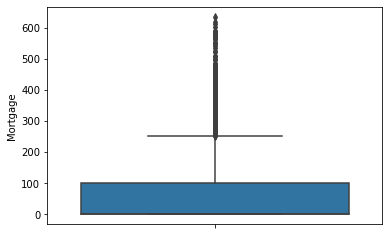

In [13]:
sns.boxplot(y='Mortgage',data=df_bank_loan_data)

## Number of people with zero credit card spending per month?
* Distribution of CCAvg (Average Credit Card Spending) across the entire data
* Absolute count of people with Zero Credit Card Spending
* Box plot to see outliers and percentiles

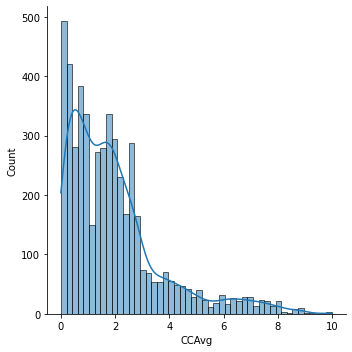

In [14]:
sns.displot(df_bank_loan_data, x='CCAvg', kde=True)

In [15]:
# number of people with zero credit card spending
zero_cc_avg_count = df_bank_loan_data[df_bank_loan_data['CCAvg']==0]['CCAvg'].count()
print(f'People with 0 Credit Card Spending: {zero_cc_avg_count}')

People with 0 Credit Card Spending: 106


<AxesSubplot:ylabel='CCAvg'>

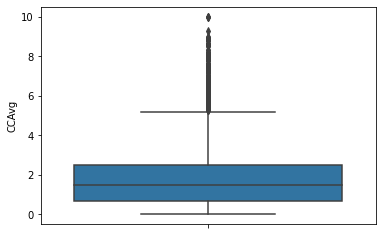

In [16]:
sns.boxplot(y='CCAvg',data=df_bank_loan_data)

## Value counts of all categorical columns.
**Note:** I am excluding IDs as they are unique values representing each sample and as such don't have any practical value.
The following Categorical attributes remain after that:
* ZIP Code: Home Address ZIP
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

### ZIP Code Value Counts

In [17]:
zip_code_value_counts = df_bank_loan_data['ZIP Code'].value_counts(sort=True,ascending=False)
zip_code_value_counts

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

### Education Value Counts

In [18]:
education_value_counts = df_bank_loan_data['Education'].value_counts(sort=True,ascending=False)
education_value_counts

1    2096
3    1501
2    1403
Name: Education, dtype: int64

### Binary Attributes Value Counts
* Personal Loan
* Securities Account
* CD Account
* Online
* CreditCard

In [19]:
binary_value_counts = pd.DataFrame({'Personal Loan': df_bank_loan_data['Personal Loan'].value_counts()})
binary_value_counts['Securities Account'] = df_bank_loan_data['Securities Account'].value_counts()
binary_value_counts['CD Account'] = df_bank_loan_data['CD Account'].value_counts()
binary_value_counts['Online'] = df_bank_loan_data['Online'].value_counts()
binary_value_counts['CreditCard'] = df_bank_loan_data['CreditCard'].value_counts()
binary_value_counts.transpose()

,0,1
Personal Loan,4520,480
Securities Account,4478,522
CD Account,4698,302
Online,2016,2984
CreditCard,3530,1470


## Univariate & Bivariate analysis of all columns
**Note:** Excluding Ids as they are unique values

### Age

<AxesSubplot:xlabel='Age', ylabel='CCAvg'>

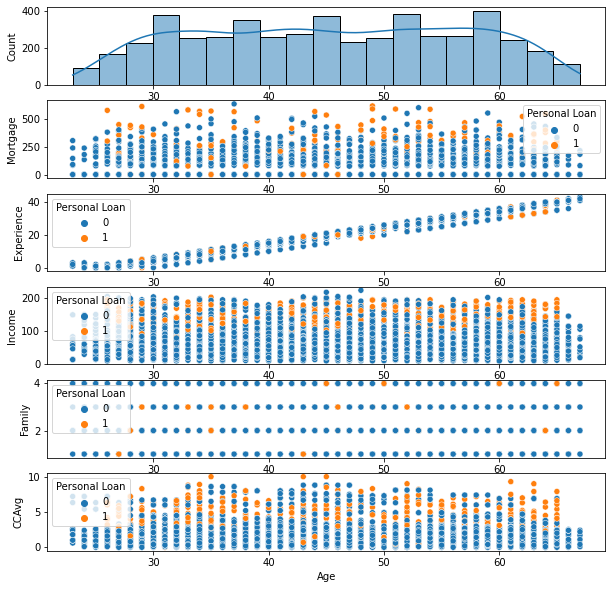

In [20]:
fig, axes = plt.subplots(6, 1, figsize=(10, 10), sharey=False)
sns.histplot(df_bank_loan_data,ax=axes[0], x='Age', kde=True)
sns.scatterplot(data=df_bank_loan_data, x='Age', y='Mortgage', hue='Personal Loan', ax=axes[1])
sns.scatterplot(data=df_bank_loan_data, x='Age', y='Experience', hue='Personal Loan', ax=axes[2])
sns.scatterplot(data=df_bank_loan_data, x='Age', y='Income', hue='Personal Loan', ax=axes[3])
sns.scatterplot(data=df_bank_loan_data, x='Age', y='Family', hue='Personal Loan', ax=axes[4])
sns.scatterplot(data=df_bank_loan_data, x='Age', y='CCAvg', hue='Personal Loan', ax=axes[5])

### Experience

<AxesSubplot:xlabel='Experience', ylabel='CCAvg'>

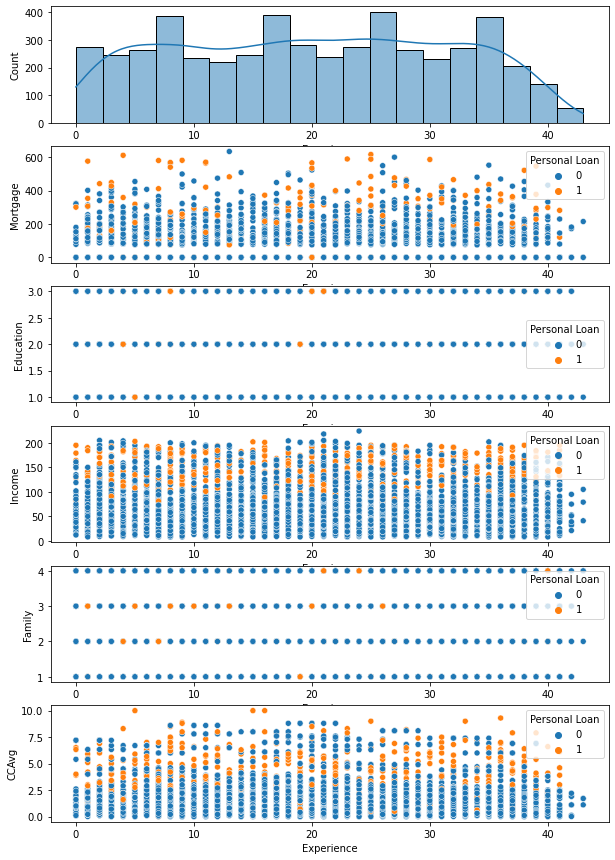

In [21]:
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharey=False)
sns.histplot(df_bank_loan_data,ax=axes[0], x='Experience', kde=True)
sns.scatterplot(data=df_bank_loan_data, x='Experience', y='Mortgage', hue='Personal Loan', ax=axes[1])
sns.scatterplot(data=df_bank_loan_data, x='Experience', y='Education', hue='Personal Loan', ax=axes[2])
sns.scatterplot(data=df_bank_loan_data, x='Experience', y='Income', hue='Personal Loan', ax=axes[3])
sns.scatterplot(data=df_bank_loan_data, x='Experience', y='Family', hue='Personal Loan', ax=axes[4])
sns.scatterplot(data=df_bank_loan_data, x='Experience', y='CCAvg', hue='Personal Loan', ax=axes[5])

### Income

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

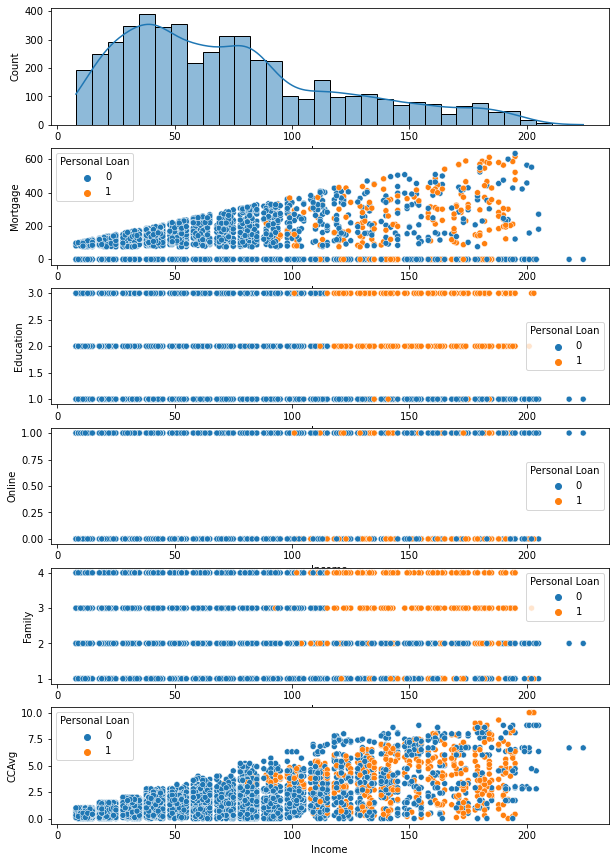

In [22]:
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharey=False)
sns.histplot(df_bank_loan_data,ax=axes[0], x='Income', kde=True)
sns.scatterplot(data=df_bank_loan_data, x='Income', y='Mortgage', hue='Personal Loan', ax=axes[1])
sns.scatterplot(data=df_bank_loan_data, x='Income', y='Education', hue='Personal Loan', ax=axes[2])
sns.scatterplot(data=df_bank_loan_data, x='Income', y='Online', hue='Personal Loan', ax=axes[3])
sns.scatterplot(data=df_bank_loan_data, x='Income', y='Family', hue='Personal Loan', ax=axes[4])
sns.scatterplot(data=df_bank_loan_data, x='Income', y='CCAvg', hue='Personal Loan', ax=axes[5])

### Family

<AxesSubplot:xlabel='Family', ylabel='CCAvg'>

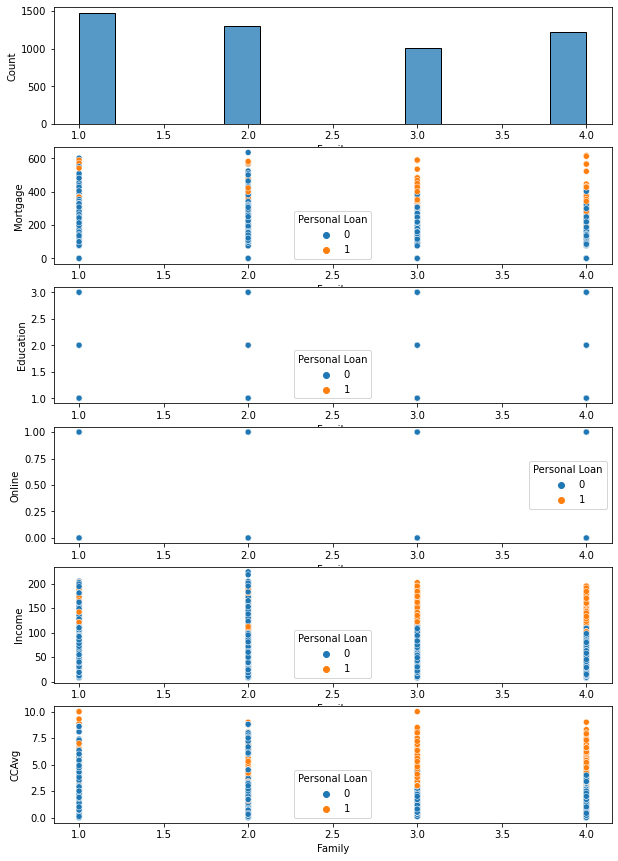

In [23]:
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharey=False)
sns.histplot(df_bank_loan_data,ax=axes[0], x='Family')
sns.scatterplot(data=df_bank_loan_data, x='Family', y='Mortgage', hue='Personal Loan', ax=axes[1])
sns.scatterplot(data=df_bank_loan_data, x='Family', y='Education', hue='Personal Loan', ax=axes[2])
sns.scatterplot(data=df_bank_loan_data, x='Family', y='Online', hue='Personal Loan', ax=axes[3])
sns.scatterplot(data=df_bank_loan_data, x='Family', y='Income', hue='Personal Loan', ax=axes[4])
sns.scatterplot(data=df_bank_loan_data, x='Family', y='CCAvg', hue='Personal Loan', ax=axes[5])

### CCAvg

<AxesSubplot:xlabel='CCAvg', ylabel='Age'>

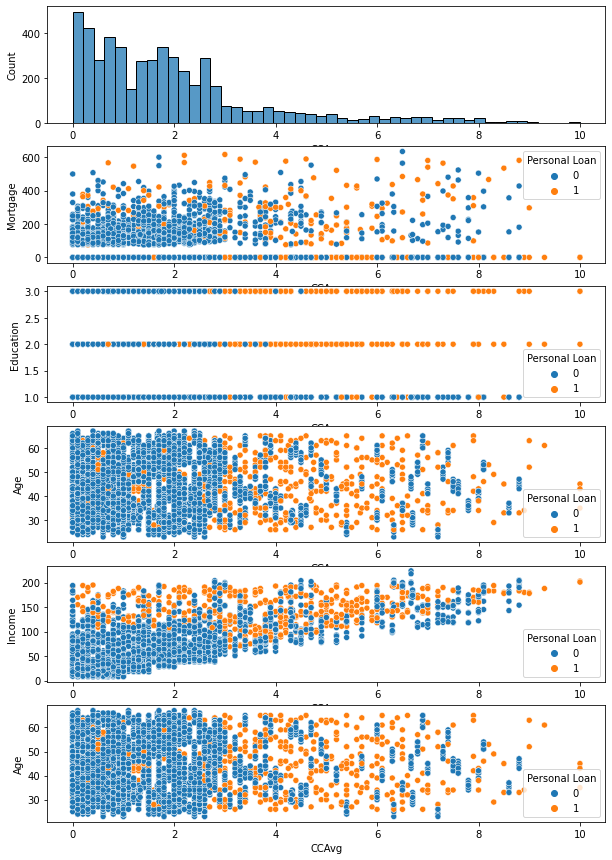

In [24]:
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharey=False)
sns.histplot(df_bank_loan_data,ax=axes[0], x='CCAvg')
sns.scatterplot(data=df_bank_loan_data, x='CCAvg', y='Mortgage', hue='Personal Loan', ax=axes[1])
sns.scatterplot(data=df_bank_loan_data, x='CCAvg', y='Education', hue='Personal Loan', ax=axes[2])
sns.scatterplot(data=df_bank_loan_data, x='CCAvg', y='Age', hue='Personal Loan', ax=axes[3])
sns.scatterplot(data=df_bank_loan_data, x='CCAvg', y='Income', hue='Personal Loan', ax=axes[4])
sns.scatterplot(data=df_bank_loan_data, x='CCAvg', y='Age', hue='Personal Loan', ax=axes[5])

### Education

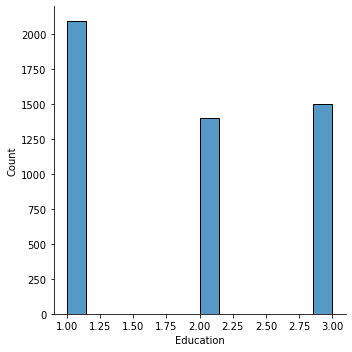

In [25]:
sns.displot(df_bank_loan_data, x='Education')

In [26]:
corr = df_bank_loan_data.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<AxesSubplot:>

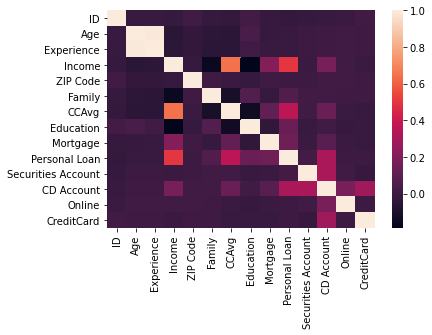

In [27]:
sns.heatmap(data=corr)

## Get data model ready
* remove ID and ZIP Code
* one hot encode categorical variables

In [28]:
# let's drop the ID and Zip Code columns because 
# IDs are all unique values and
# Zip Codes are 467 unique categorical values - they would add a lot of dummy variables if we were to use them
df_bank_loan_data_cleaned = df_bank_loan_data.drop(['ID', 'ZIP Code'], axis=1)

In [29]:
df_bank_loan_data_cleaned.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


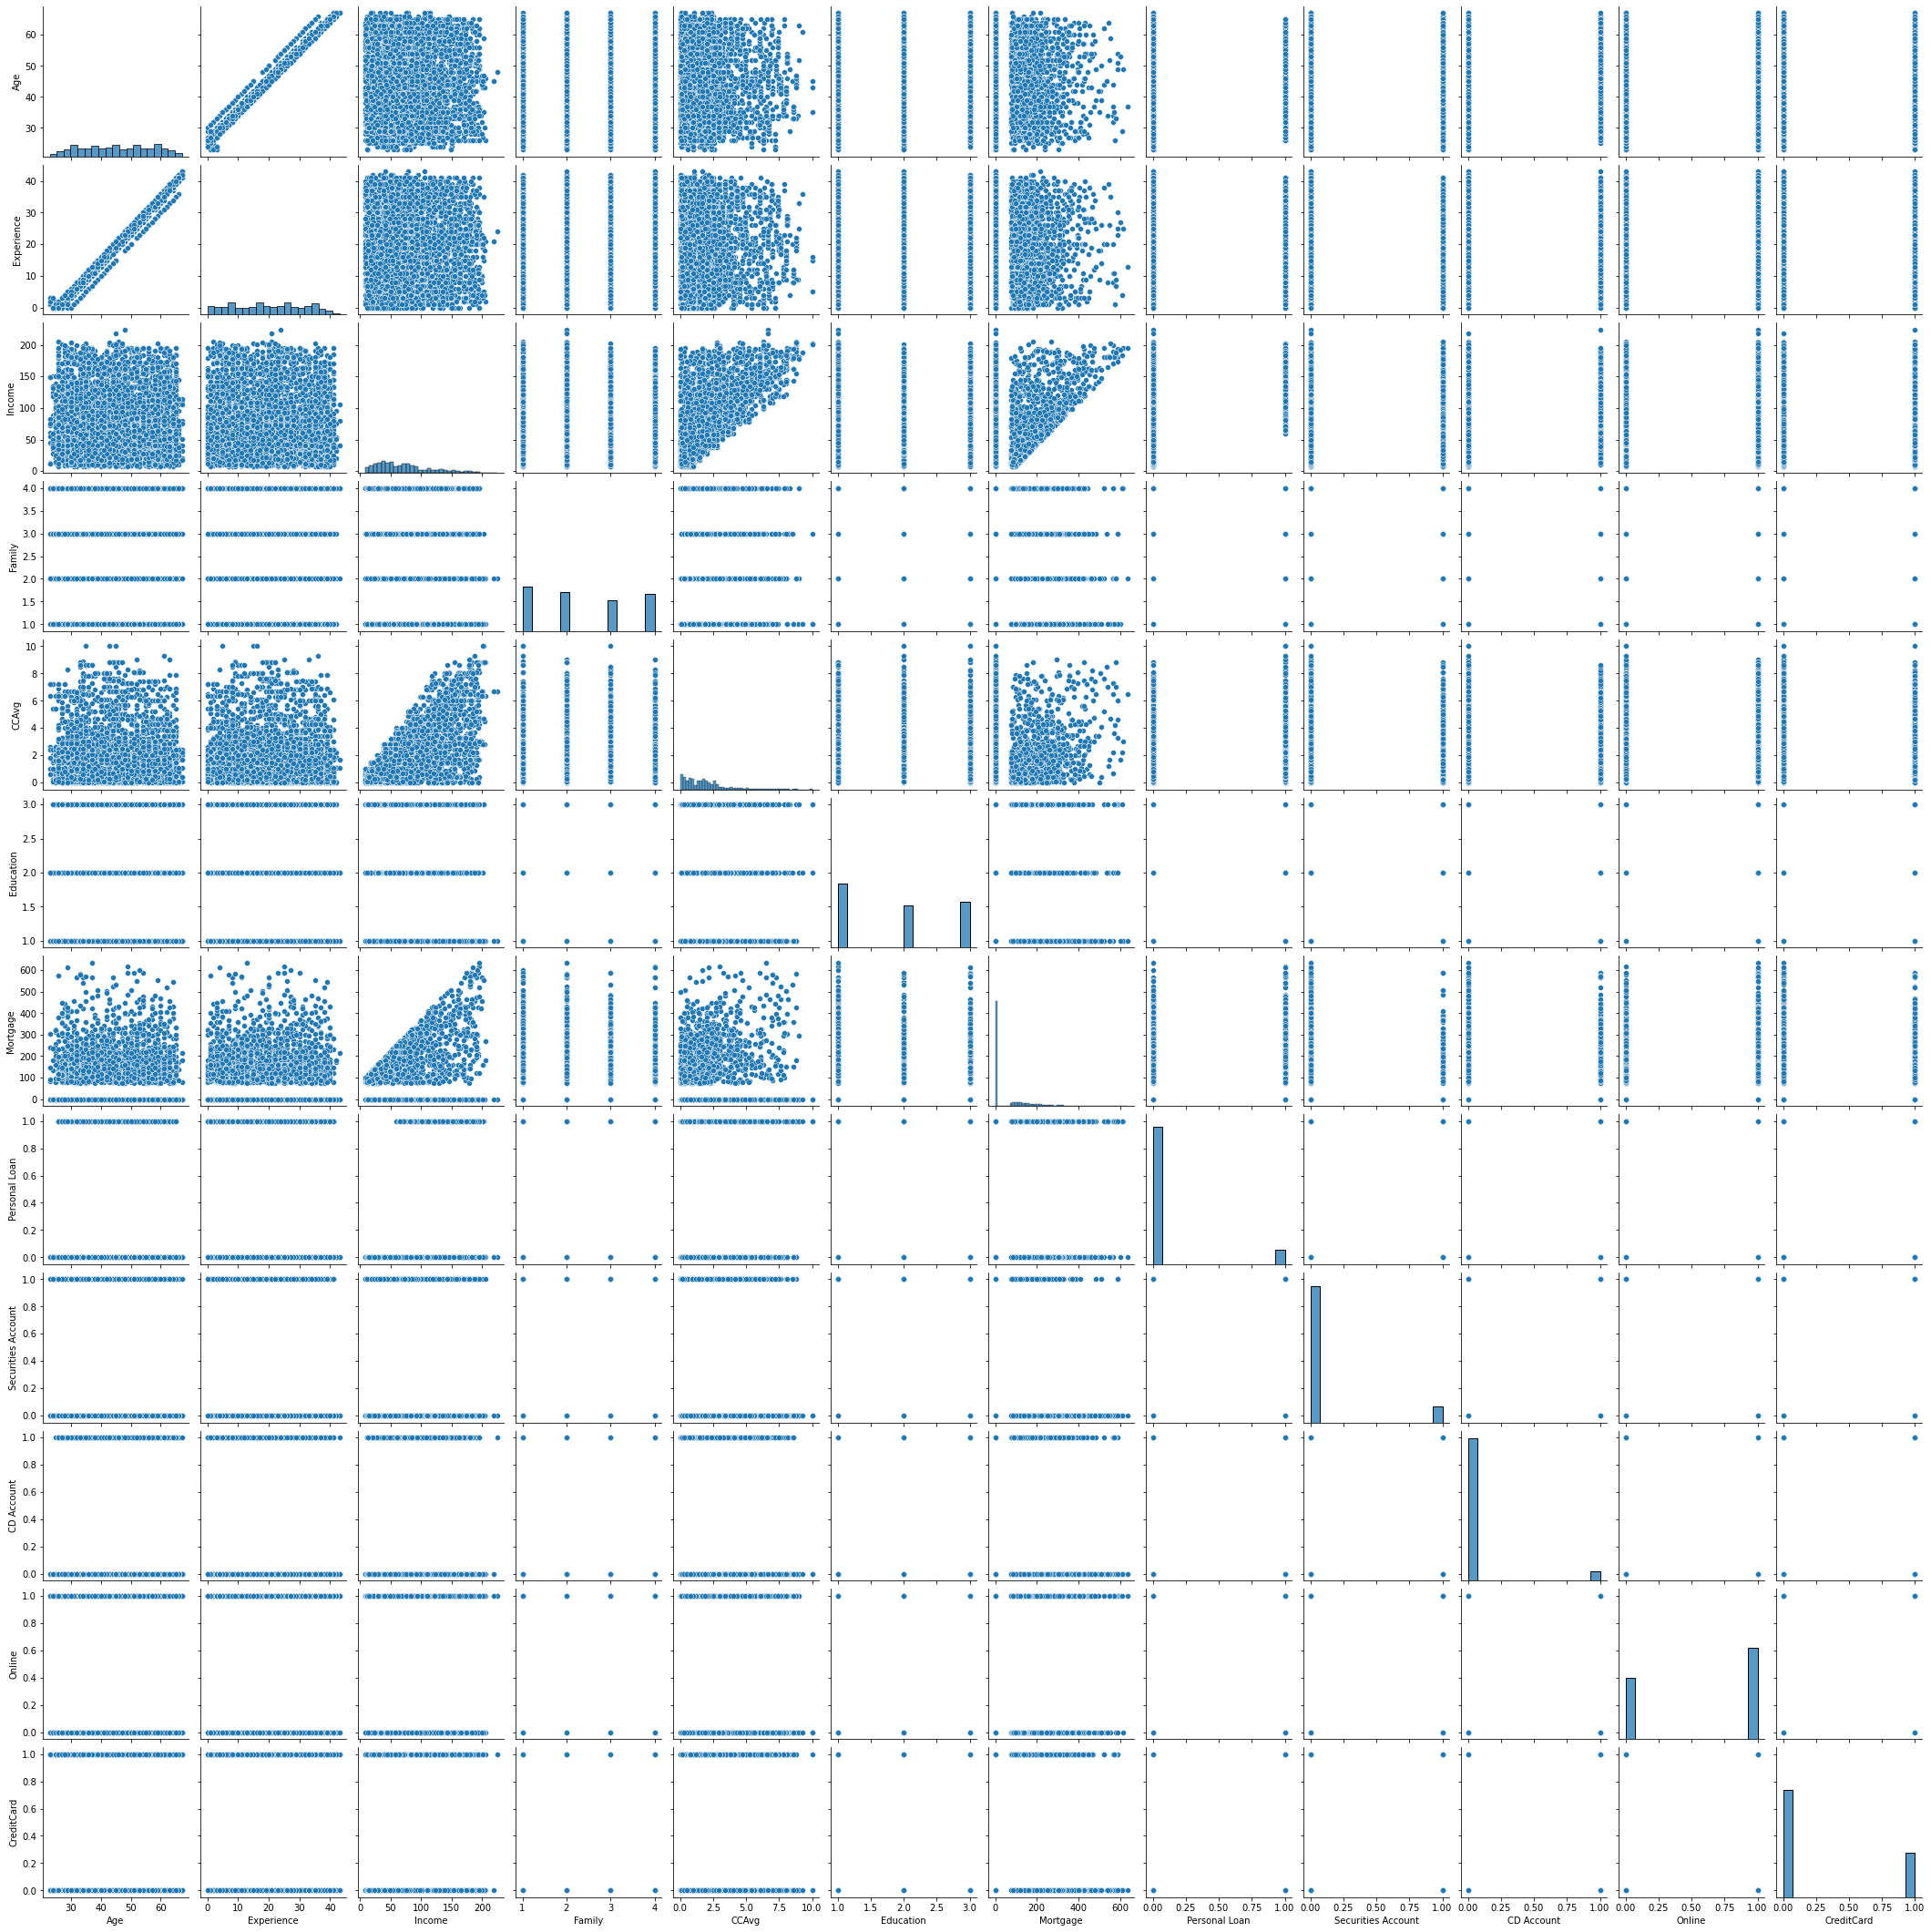

In [30]:
# let's visualize the distribution of each attribute and see which values look correlated
sns.pairplot(data=df_bank_loan_data_cleaned)

In [31]:
# preprocess some of the values (may be this is not required - let's see)
def yes_no_encoder(value):
    if value == 0:
        return 'No'
    else:
        return 'Yes'
def education_encoder(value):
    if value==1:
        return 'Undergrad'
    elif value==2:
        return 'Graduate'
    else:
        return 'Professional'

df_bank_loan_data_cleaned['Education']=df_bank_loan_data_cleaned['Education'].apply(education_encoder)
df_bank_loan_data_cleaned['SecuritiesAccount']=df_bank_loan_data_cleaned['Securities Account'].apply(yes_no_encoder)
df_bank_loan_data_cleaned['CDAccount']=df_bank_loan_data_cleaned['CD Account'].apply(yes_no_encoder)
df_bank_loan_data_cleaned['Online']=df_bank_loan_data_cleaned['Online'].apply(yes_no_encoder)
df_bank_loan_data_cleaned['CreditCard']=df_bank_loan_data_cleaned['CreditCard'].apply(yes_no_encoder)
df_bank_loan_data_cleaned.drop(['Securities Account', 'CD Account'], axis=1, inplace=True)
df_bank_loan_data_cleaned.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Online,CreditCard,SecuritiesAccount,CDAccount
0,25,1.0,49,4,1.6,Undergrad,0,0,No,No,Yes,No
1,45,19.0,34,3,1.5,Undergrad,0,0,No,No,Yes,No
2,39,15.0,11,1,1.0,Undergrad,0,0,No,No,No,No
3,35,9.0,100,1,2.7,Graduate,0,0,No,No,No,No
4,35,8.0,45,4,1.0,Graduate,0,0,No,Yes,No,No


In [32]:
df_bank_loan_data_cleaned_dummies = pd.get_dummies(df_bank_loan_data_cleaned, columns=["Education", "SecuritiesAccount", "CDAccount","Online","CreditCard"], prefix=["Education","SecuritiesAccount","CDAccount","Online","CreditCard"] )
df_bank_loan_data_cleaned_dummies.head()
#model is now ready


,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Education_Graduate,Education_Professional,Education_Undergrad,SecuritiesAccount_No,SecuritiesAccount_Yes,CDAccount_No,CDAccount_Yes,Online_No,Online_Yes,CreditCard_No,CreditCard_Yes
0,25,1.0,49,4,1.6,0,0,0,0,1,0,1,1,0,1,0,1,0
1,45,19.0,34,3,1.5,0,0,0,0,1,0,1,1,0,1,0,1,0
2,39,15.0,11,1,1.0,0,0,0,0,1,1,0,1,0,1,0,1,0
3,35,9.0,100,1,2.7,0,0,1,0,0,1,0,1,0,1,0,1,0
4,35,8.0,45,4,1.0,0,0,1,0,0,1,0,1,0,1,0,0,1


# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [33]:
X = df_bank_loan_data_cleaned_dummies.drop('Personal Loan', axis = 1)
y = df_bank_loan_data_cleaned_dummies['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97860)
X_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Graduate,Education_Professional,Education_Undergrad,SecuritiesAccount_No,SecuritiesAccount_Yes,CDAccount_No,CDAccount_Yes,Online_No,Online_Yes,CreditCard_No,CreditCard_Yes
2785,34,9.0,31,4,1.1,85,0,1,0,0,1,0,1,0,1,0,1
641,35,10.0,139,2,7.8,0,0,0,1,1,0,1,0,1,0,1,0
1791,48,22.0,139,1,0.0,0,0,0,1,1,0,0,1,0,1,0,1
2194,34,9.0,123,1,1.6,0,1,0,0,1,0,1,0,0,1,1,0
2624,47,21.0,82,3,2.1,0,0,0,1,1,0,1,0,1,0,1,0


# 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [34]:
logistic_model = LogisticRegression(solver="liblinear")
logistic_model.fit(X_train, y_train)
predictions=logistic_model.predict(X_test)

In [35]:
score = logistic_model.score(X_test, y_test)
print(f'Score is: {score}')

Score is: 0.954


In [36]:
confusion = metrics.confusion_matrix(y_test, predictions, labels=[1, 0])
df_confusion = pd.DataFrame(confusion, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Prediction 1","Prediction 0"]])
df_confusion

,Prediction 1,Prediction 0
1,92,54
0,15,1339


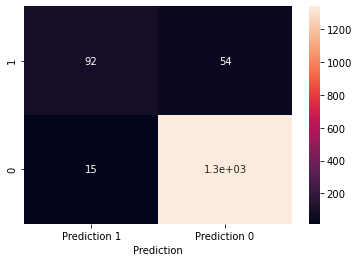

In [37]:
sns.heatmap(df_confusion,annot=True)
plt.xlabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [38]:
recall = metrics.recall_score(y_test, predictions)
precision=metrics.precision_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)
roc_auc=metrics.roc_auc_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'Recall: {recall}')
print(f'precision: {precision}')
print(f'f1: {f1}')
print(f'roc_auc: {roc_auc}')
print(f'accuracy: {accuracy}')

Recall: 0.6301369863013698
precision: 0.8598130841121495
f1: 0.7272727272727273
roc_auc: 0.809529349871512
accuracy: 0.954


# 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [39]:
columns = list(X_test.columns)
coefficients = pd.DataFrame(logistic_model.coef_, columns=columns)
coefficients['intercept'] = logistic_model.intercept_
coefficients.transpose()

,0
Age,-0.210778
Experience,0.217708
Income,0.056002
Family,0.590040
CCAvg,0.161098
Mortgage,0.000833
Education_Graduate,0.706830
Education_Professional,0.951106
Education_Undergrad,-2.888212
SecuritiesAccount_No,-0.216724


In [40]:
actual_vs_predictions = {'actual': y_test, 'predictions': predictions}
df_actual_vs_predictions = pd.DataFrame(actual_vs_predictions)
wrong_predictions=X_test.loc[df_actual_vs_predictions['actual']!=df_actual_vs_predictions['predictions']]
wrong_prediction_results = wrong_predictions.join(df_actual_vs_predictions)
wrong_prediction_results

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Graduate,Education_Professional,Education_Undergrad,SecuritiesAccount_No,SecuritiesAccount_Yes,CDAccount_No,CDAccount_Yes,Online_No,Online_Yes,CreditCard_No,CreditCard_Yes,actual,predictions
3288,56,30.0,140,4,0.5,292,0,0,1,1,0,1,0,1,0,1,0,1,0
382,65,41.0,133,4,2.0,0,0,0,1,1,0,1,0,1,0,0,1,1,0
1632,31,5.0,93,2,3.1,0,1,0,0,1,0,1,0,0,1,1,0,1,0
737,64,37.0,138,2,2.8,0,1,0,0,1,0,1,0,0,1,1,0,1,0
4627,27,1.0,134,1,1.7,307,1,0,0,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,25,1.0,109,4,2.3,314,0,1,0,1,0,1,0,0,1,1,0,0,1
3573,60,36.0,165,3,5.6,0,0,0,1,1,0,1,0,1,0,0,1,1,0
728,45,20.0,114,2,4.4,0,1,0,0,1,0,1,0,1,0,1,0,1,0
4941,28,4.0,112,2,1.6,0,1,0,0,1,0,1,0,0,1,1,0,1,0


### So it works
My confusion matrix shows the following:
* True Positives: 92
* True Negatives: 1339
* False Positives: 15
* False Negatives: 54

In the above dataframe ```wrong_prediction_results``` we have 69 {False Positives(15) + False Negatives(54)} rows which have been misclassified.

# 6. Give conclusion related to the Business understanding of your model? (5 marks)

## Some key insights about the data and model.
While the data was mostly clean without any null values, there were a few inconsistencies like:
* we had a few incorrect values like negative number of years in experience, after analysing the data I concluded that it was most likely an artifact of typos or data transformation.
* The mortgage data was heavily skewed - most of the examples in the data were of individuals who did not go for the personal loan offer and as a result our model is a bit biased towards negative values (see false negatives above)
* I chose a different approach and experimented to one hot encode all the binary categorical variables. Although it might not have added much value but the result is still satisfactory with acceptable scores for the model.
* regarding the samples in the data we can say that:
    - There is a tendency in the higher income groups to avail personal loan offers.
    - Higher income group individuals (100K plus) with 3 or more family members are more likely to avail our personal loan offers.
    - Graduates and professionals are more likely to avail the personal loan offer.
    - Individuals of all ages with higher average credit card spending are more inclined towards our personal loan offers.